# Don't Overfit II


Don't Overfit II it's an Kaggle's competition where the goal it's to predict a binary target variable using 300 continuos variables without information about domain knowledge.

Here I will explore techniques based on Feature Selection and Dimensionality Reduction to learn more about them and improve my skills on Data Science.

This notebook it's based on:

https://towardsdatascience.com/feature-selection-and-dimensionality-reduction-f488d1a035de <br>
https://www.kaggle.com/tboyle10/feature-selection

Link to Kaggle's competition:

https://www.kaggle.com/c/dont-overfit-ii

In [1]:
#Import's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import feature_selection

from sklearn.decomposition import PCA

#gpplot style
plt.style.use('ggplot')

In [2]:
#Read data
df_train = pd.read_csv('train.csv',dtype={'target':int})
df_test = pd.read_csv('test.csv')

In [3]:
#Show some lines - train
df_train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
#Show some lines - test
df_test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [5]:
#Some statistics
df_train.drop(columns=['id','target']).describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,-0.643500,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,-0.012500,0.052000,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,0.635000,0.733000,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,2.512000,2.959000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In a first look you will realize that it's very hard to understand what which variable means and it's dificult too extract some insights about them. It seems that all variables have statistics very close to each other.

Because these dificult we will explore techniques to perform feature selection and dimensionality reduction.

Let's take a look of proportion in target variable.

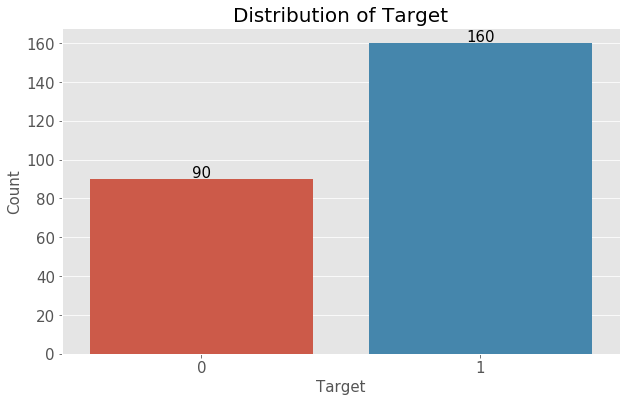

In [6]:
#Plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Distribution of Target',size=20)
sns.countplot(data=df_train,x='target',ax=ax)

#Change size of xticklabels/yticklabels
for tick_x in ax.get_xticklabels():
    tick_x.set_fontsize(15)
    
for tick_y in ax.get_yticklabels():
    tick_y.set_fontsize(15)

#Set patches
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.0f}'.format(p.get_height())
    ax.text(_x, _y+1, value, ha="center",size=15) 

#Change size of xlabel/ylabel
ax.set_xlabel('Target',size=15)
ax.set_ylabel('Count',size=15)

plt.show()

In [7]:
#In percentage
df_train['target'].value_counts(normalize=True)

1    0.64
0    0.36
Name: target, dtype: float64

See that we have imbalanced class.

## 1. Baseline Models

It's interesting to have a baseline model to know how good it's our prediction without doing anything. Here we will use Logistic Regression and Random Forest because they are two good models in binary problems and with them it's possible to know the importante of each feature.

Important: In Logistic Regression we will use Lasso in penalty because this regularization have the property to generate sparse matrix of features, i.e, some variables reach zero.

In [8]:
'''Perform one evaluation on training with Logistic Regression and Random Forest using Cross-Validation'''
# X: Independent variables
# Y: Dependent variable
def evaluate_training(X,Y):    
        
    #Standarize data
    X = StandardScaler().fit_transform(X)

    #Create models
    lr = LogisticRegression(solver='liblinear',penalty='l1')
    rf =RandomForestClassifier(n_estimators=100)

    #Training
    lr_scores = cross_val_score(lr,X,Y,cv=5,scoring='roc_auc')
    rf_scores = cross_val_score(rf, X,Y, cv=5, scoring='roc_auc')

    print('LR Scores:',lr_scores)
    print('RF Scores:',rf_scores)

In [9]:
#Divide dataset
X_train = df_train.select_dtypes('float')
Y_train = df_train['target']
evaluate_training(X_train,Y_train)

LR Scores: [0.78125    0.81770833 0.75347222 0.85416667 0.85763889]
RF Scores: [0.71614583 0.74913194 0.62673611 0.64583333 0.76128472]


You can see that each fold has a high variance between then, this implies in overfit. So it's important to try some kind of selection/reduction in features to avoid this problem.

Other important thing to note it's Logistic Regression with Lasso perform better than Random Forest.

Let's take a look in features importance using Random Forest.

In [10]:
'''Extract feature importance from Random Forest'''
# clf: Random Forest Classifier to extract important features
# n: Number of features to extract (Default n= 20)
def extract_feature_importance(clf,n=20):
    
    #Get features importance
    feature_importances = clf.feature_importances_

    #Transform in percentage
    feature_importances = (feature_importances*100)

    #Convert to series
    feature_importances = pd.Series(feature_importances)

    #Sort
    feature_importances.sort_values(ascending=False,inplace=True)

    #Get the n most important features
    return feature_importances[0:n]

In [11]:
'''Plot feature importance'''
# x: Array to use in x axis.
# y: Array to use in y axis.
def plot_feature_importance(x,y):

    #Plot
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.set_title('Feature Importance',size=20)
    sns.barplot(x=x,y=y,order=y,color='darkblue',ax=ax,orient='h')

    #Set labels
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature Index')

    plt.show()

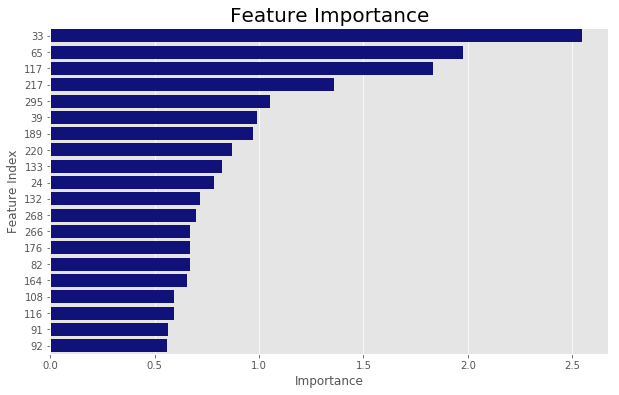

In [12]:
#Traning and fit RF
rf = RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)

#Extract most important features
feature_importances = extract_feature_importance(rf)

#Plot
plot_feature_importance(feature_importances.values,feature_importances.index)

Note that we don't have any feature with realy high feature.

## 2 Feature Selection

### 2.1 Remove features with missing values

Let's take a look in missing values on data.

In [13]:
#Missing values
df_train.isna().any().any()

False

This dataset don't have any missing values to remove some column.

## 2.2 Remove features with low variance

Features with low variance it's not interesting to us, because they do not generate very large discrimination in classes, i.e, the idea it's they don't have a lot of information.

In [14]:
#Computes variation for each feature
var_feat = df_train.select_dtypes('float').var()

In [15]:
#Show some lines
var_feat.head()

0    0.996711
1    1.018714
2    1.043889
3    1.023641
4    1.072075
dtype: float64

In [16]:
#Variation of variation
var_feat.var()

0.007723594136024178

You can see that out features don't have a lot variation and they are almost equal. So it will be very dificult chose a good threshold.

Because this we will just check with we have some column with no variance.

In [17]:
#Create selector
sel = feature_selection.VarianceThreshold()

#Apply selector
train_var = sel.fit_transform(df_train.select_dtypes('float'))

#Let's see if we cut some features
train_var.shape

(250, 300)

For the result above the dataset don't have any column with no variance.

### 2.3. Remove highly correlated features

If we have a big high correlation between two features it's possible to one of them. You can thing this is possible because the two will have almost the same information.

Beyond this, highly correlated features will involve in overfit and multicolinearity in some models.

In [18]:
#Correlation between target and features - Just the highest
df_train.corr()['target'].abs().sort_values(ascending=False).head(20)

target    1.000000
33        0.373608
65        0.293846
217       0.207215
117       0.197496
91        0.192536
24        0.173096
295       0.170501
73        0.167557
183       0.164146
80        0.162558
199       0.159442
189       0.155956
id        0.151498
194       0.150384
16        0.144267
39        0.142915
165       0.142526
201       0.142238
129       0.139439
Name: target, dtype: float64

See that we don't have any feature highly correlated with target.

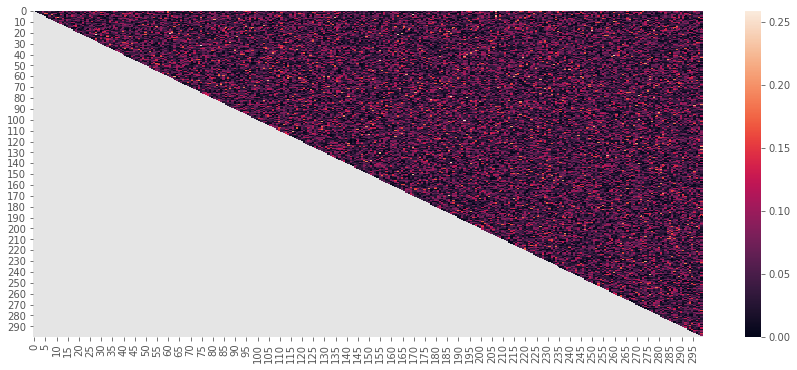

In [19]:
#Correlation among features
corr_feat = df_train.select_dtypes('float').corr().abs()

#Select upper triangle of correlation matrix
corr_feat = corr_feat.where(np.triu(np.ones(corr_feat.shape), k=1).astype(np.bool))

#Heatmap of correlations
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_feat,ax=ax)
plt.show()

It's too dificult see correlation among features as we have a lot of features. So let's do some calculations.

In [20]:
#Check some column with correlatio higher than 0.5
drop_cols = corr_feat.apply(lambda x: (x>0.5).sum() > 1,axis=0)

In [21]:
#Check columns to drop
drop_cols[drop_cols == True]

Series([], dtype: bool)

So we see that we don't have any higher correlation among features and between feature with target. So we can't do anything with this.

### 2.4 Univariate Feature Selection

Let's try to use SelectKBest with ANOVA for univariate selection.

In [22]:
#Divide dataset
X = df_train.select_dtypes('float')
Y = df_train['target']

#Select 100 best features with ANOVA
kbest = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=100)

#Fit
kbest = kbest.fit(X,Y)

#Transform
X = kbest.transform(X)

LR Scores: [0.859375   0.90798611 0.84722222 0.9375     0.91493056]
RF Scores: [0.734375   0.79513889 0.80642361 0.80208333 0.82638889]


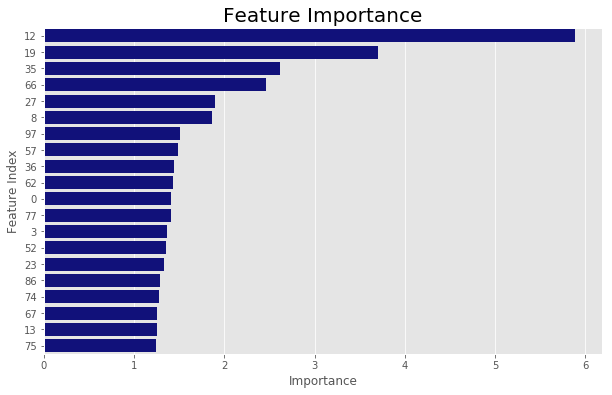

In [23]:
#Evaluating
evaluate_training(X,Y)

#Traning and fit RF
rf = RandomForestClassifier(n_estimators=100).fit(X,Y)

#Extract most important features
feature_importances = extract_feature_importance(rf)

#Plot
plot_feature_importance(feature_importances.values,feature_importances.index)

It's interesting to see that both models have improvement on AUC but we still have variations in each fold (overfitting).

Let's try to do more improvements.

In [24]:
#Concat target variable with important features
df_new_train = pd.concat([df_train['target'],pd.DataFrame(X)],axis=1)

### 2.5 Recursive Feature Elimination

Recursive feature selection remove recursively the least important features. 

We will use Logistic Regression to select features.

In [25]:
#Divide dataset
X = df_new_train.select_dtypes('float')
Y = df_new_train['target']

#Traning and fit lr
lr = LogisticRegression(solver='liblinear',penalty='l1').fit(X,Y)

#Feature extraction
rfe = feature_selection.RFE(lr,n_features_to_select=50)

#Fit
rfe.fit(X,Y)

#Transform
X = rfe.transform(X)

LR Scores: [0.94270833 0.94791667 0.92534722 1.         0.96180556]
RF Scores: [0.81076389 0.86892361 0.78125    0.86545139 0.81597222]


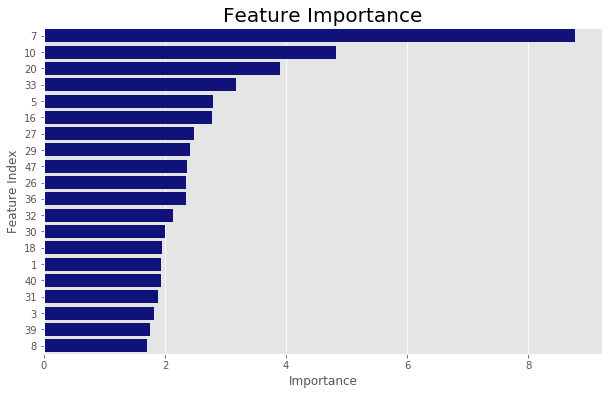

In [26]:
#Evaluating
evaluate_training(X,Y)

#Traning and fit RF
rf = RandomForestClassifier(n_estimators=100).fit(X,Y)

#Extract most important features
feature_importances = extract_feature_importance(rf)

#Plot
plot_feature_importance(feature_importances.values,feature_importances.index)

With recusive feature selection the Logistic Regression appear to not have more overfit. We still have an variation but it's very lower. In Random Forest this variation it's higher.

Let's try to do more improvements.

In [27]:
#Concat target variable with important features
df_new_train = pd.concat([df_train['target'],pd.DataFrame(X)],axis=1)

### 2.6 Feature selection using SelectFromModel

Like recursive feature selection SelectFromModel remove features, but it's considered in removal just features that have importance below some threshold.

We will use Logistic Regression to select features.

In [28]:
#Divide dataset
X = df_new_train.select_dtypes('float')
Y = df_new_train['target']

#Traning and fit lr
lr = LogisticRegression(solver='liblinear',penalty='l1').fit(X,Y)

# feature extraction
X = feature_selection.SelectFromModel(lr).fit_transform(X,Y)

LR Scores: [0.94444444 0.94791667 0.92534722 1.         0.96180556]
RF Scores: [0.75260417 0.88802083 0.796875   0.83940972 0.80642361]


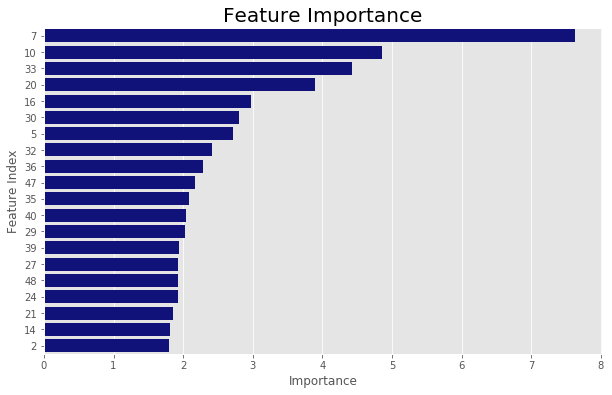

In [29]:
#Evaluating
evaluate_training(X,Y)

#Traning and fit RF
rf = RandomForestClassifier(n_estimators=100).fit(X,Y)

#Extract most important features
feature_importances = extract_feature_importance(rf)

#Plot
plot_feature_importance(feature_importances.values,feature_importances.index)

Using SelectFromModel we don't have any improvement, so it's better discard it.

# 3. Dimensionality Reduction - PCA

Principle Component Analysis (PCA) is a dimensionality reduction technique very used in Data Science projects.

PCA it's good to use in cases when we have excessive multicollinearity or explanation of predictors is not a priority.

In [30]:
'''Plot explained variance by PCA'''
def plot_pca(pca,size):
    #Plot of size first PC's
    x_list = []
    for i in range(size):
        x_list.append('PC' + str(i+1))

    #Plot figure
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    ax.set_title('Explained variance by different principal components')
    ax.bar(height=pca.explained_variance_ratio_[0:size],x=x_list,width=0.9,label='Individual')
    ax.plot(x_list,np.cumsum(pca.explained_variance_ratio_[0:size]),marker='o',color='orange',label='Cumulative')
    ax.legend()

    #Rotate xtick
    for xtick_x in ax.get_xticklabels():
        xtick_x.set_rotation(60)

    plt.show()

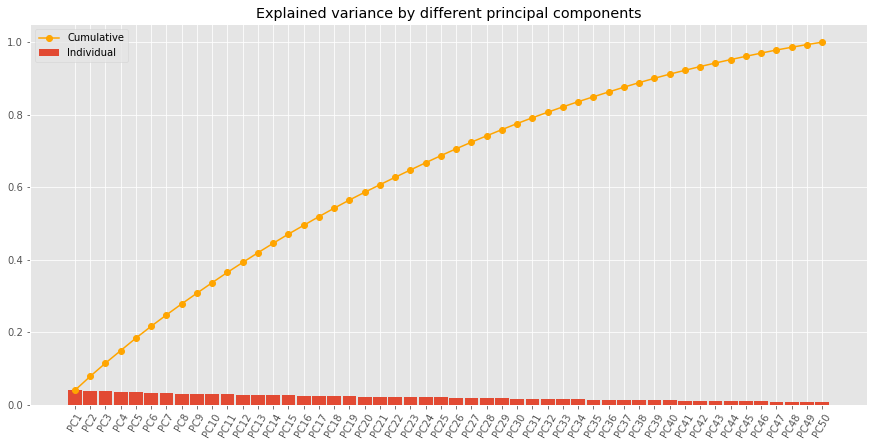

In [31]:
#Divide dataset
X = df_new_train.select_dtypes('float')
Y = df_new_train['target']

#Standarize data
ss = StandardScaler().fit(X)
X = ss.transform(X)

#PCA;
pca = PCA().fit(X)

#Plot
plot_pca(pca,X.shape[1])

By the figure we can see that an adition of each component increase the explained variance. It's a bit hard to understand the better choice.

Let's do some calculations.

In [32]:
#Explained variance of 40 PC's
pca.explained_variance_ratio_[0:40].sum()

0.9118477360747463

With 40 PC's we achieve almost 90% of explained variance. It's not much reduction because we have 50 componentes but let's try to see the AUC with this.

In [33]:
#Transform
X = pca.transform(X)[:,0:40]

LR Scores: [0.97395833 0.94097222 0.96180556 0.99131944 0.96527778]
RF Scores: [0.86371528 0.84895833 0.92534722 0.82378472 0.79947917]


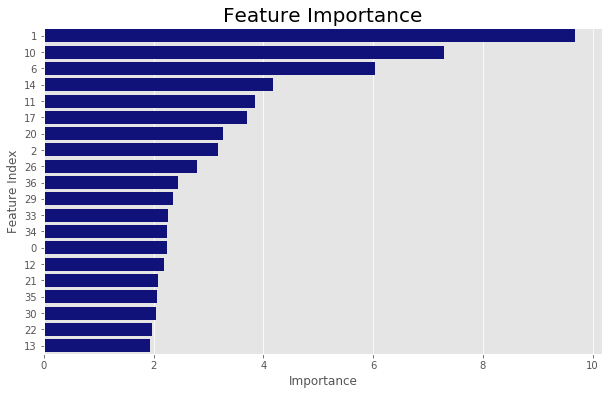

In [34]:
#Evaluating
evaluate_training(X,Y)

#Traning and fit RF
rf = RandomForestClassifier(n_estimators=100).fit(X,Y)

#Extract most important features
feature_importances = extract_feature_importance(rf)

#Plot
plot_feature_importance(feature_importances.values,feature_importances.index)

Results it's almost the same. But now rather than 50 features we have 40, so it's a little improvement.

Beyond this we can see that Random Forest looks like to have an improvement too.

In [35]:
#Concat target variable with important features
df_new_train = pd.concat([df_train['target'],pd.DataFrame(X)],axis=1)

## 4. Tests

Unfortunately our test dataset does not have labels to check the AUC. In any case, we will calculate the predictions according to the logistic regression.

In [36]:
#Divide dataset
X_train = df_new_train.select_dtypes('float')
Y_train = df_new_train['target']

#Training
lr = LogisticRegression(solver='liblinear',penalty='l1').fit(X_train,Y_train)

In [37]:
'''Perform transformations in dataset'''
def transform_data(X):
    X_test = kbest.transform(X)
    X_test = rfe.transform(X_test)
    X_test = ss.transform(X_test)
    return pca.transform(X_test)[:,0:40]

In [38]:
#Transform datasetabs
X_test = transform_data(df_test.select_dtypes('float'))

In [39]:
#Predictions
lr.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

After several methods of Feature Selection and Dimensionality Reduction we reach one dataset with 40 features (original have 300) with Logistic Regression (Lasso) perform better.

Apparently with these feature engineering we avoid overfitting because the variantion in each fold it's not so high.

So, here we show some interesting techniques to use in every Data Science project that has a lot of features.